In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }



In [41]:
url = "https://uk.trustpilot.com/review/hooverdirect.co.uk"
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="Trustpilot" name="application-name"/>
  <meta content="#000032" name="theme-color"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link color="#00b67a" href="https://cdn.trustpilot.net/brand-assets/1.9.0/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="Trustpilot" name="apple-mobile-web-app-title"/

In [42]:
#reviews = soup.find_all("div", {"class": "aq_jx"})
reviews = soup.find_all(class_="typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3")

In [43]:
print(reviews)

[<p class="typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3" data-service-review-text-typography="true">This little machine has surpassed my expectation, although small and light, it is as good as my heavier corded vacuum, without the inconvenience of trailing cords. The battery charge last plenty long enough to clean my two bed flat right through, and it's compactness useful for a quick clean of spilled crumbs etc. The battery recharges in a few hours, and has several option on the method of charging. I just slip it out and do it along side my phone. Considering I have been contemplating buying a £400 alternative I am well pleased. Buying direct from Hoover was cheap and convenient and efficient, with next day delivery. Although I've only had it 5 days I would not be without it.</p>, <p class="typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_

In [44]:
#Obtained the reviews, now to repeat the process but now to produce a list
#unwanted_html_stuff = '<p class="typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3" data-service-review-text-typography="true">'
#new_list = []
#for string in reviews:
#    if unwanted_html_stuff in string:
#        unwanted_html_stuff.replace('')

In [45]:
#new_string = []
#print(reviews)
#for string in reviews:
 #   new_strings = string.replace('<p class="typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3" data-service-review-text-typography="true">', ' ')
    #new_string.append(new_strings)

In [46]:
#Because of the commas in text, must replace the commas with some other symbol before adding to list
#Okay so the easier way to do it is just to use the get_text function.

def cus_data(soup):
    # find the Html tag
    # with find()
    # and convert into string
    data_str = ""
    cus_list = []
  
    for item in soup.find_all(class_="typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3"):
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
    return cus_list
  
  
cus_res = cus_data(soup)
print(cus_res)

["This little machine has surpassed my expectation, although small and light, it is as good as my heavier corded vacuum, without the inconvenience of trailing cords. The battery charge last plenty long enough to clean my two bed flat right through, and it's compactness useful for a quick clean of spilled crumbs etc. The battery recharges in a few hours, and has several option on the method of charging. I just slip it out and do it along side my phone. Considering I have been contemplating buying a £400 alternative I am well pleased. Buying direct from Hoover was cheap and convenient and efficient, with next day delivery. Although I've only had it 5 days I would not be without it.", 'Fabulous appliance...light weight...easy to use...and perfect for carrying up and downstairs', 'Very pleased with cleaner. My only problem is that due to weak thumb joints I find it difficult to release the hose from the storage base when I wish to use it', 'Good vacuum, very good price', 'Excellent service

In [47]:
#Converting this list into a dataframe for analysis 

df = pd.DataFrame(cus_res, columns = ['Reviews'])

df


,Reviews
0,This little machine has surpassed my expectati...
1,Fabulous appliance...light weight...easy to us...
2,Very pleased with cleaner. My only problem is ...
3,"Good vacuum, very good price"
4,Excellent service ordered one day delivered n...
5,"Ordered day before, delivered the very next da..."
6,Delivery was quick but unable to register the ...
7,Very good hoover picks up pet haha brilliant
8,Great little hoover for when I don't want to d...
9,Don't use it much! It must be good.


In [28]:
#Now just to run it through a speech analysis program and perform some quantitative analysis on the results.
from textblob import TextBlob
#def analyse_text(df):
 #   def good_or_bad(review):
  #      return TextBlob(review).sentiment.polarity
   # df['TextBlob_Polarity'] = df['df'].apply(good_or_bad)
    #return df


In [48]:
df['Sentiment'] = df['Reviews'].apply(lambda Reviews: TextBlob(Reviews).sentiment.polarity)

In [49]:
df

,Reviews,Sentiment
0,This little machine has surpassed my expectati...,0.144359
1,Fabulous appliance...light weight...easy to us...,0.700000
2,Very pleased with cleaner. My only problem is ...,-0.191667
3,"Good vacuum, very good price",0.533889
4,Excellent service ordered one day delivered n...,0.483333
5,"Ordered day before, delivered the very next da...",0.400000
6,Delivery was quick but unable to register the ...,-0.216464
7,Very good hoover picks up pet haha brilliant,0.670000
8,Great little hoover for when I don't want to d...,0.042500
9,Don't use it much! It must be good.,0.475000


In [55]:
#Now just going to create a simple pie chart to display a bucket grouped data set

negative = 0
for i in df['Sentiment']:
    if i <= -0.5:
        negative += 1

In [56]:
negative

1

In [57]:
a_bit_negative = 0
for i in df['Sentiment']:
    if -0.5< i <= 0:
        a_bit_negative += 1

In [54]:
a_bit_negative

3

In [58]:
a_bit_positive = 0
for i in df['Sentiment']:
    if 0< i <= 0.5:
        a_bit_positive += 1

In [59]:
a_bit_positive


8

In [60]:
positive = 0
for i in df['Sentiment']:
    if 0.5< i:
        positive += 1

In [61]:
positive

4

In [65]:
#making this into a function for more automated use

def group_sentiments(df):
    positive = 0
    a_bit_positive = 0
    negative = 0
    a_bit_negative = 0
    for i in df['Sentiment']:
        if i <= -0.5:
            negative += 1
        elif -0.5< i <= 0:
            a_bit_negative += 1
        elif 0< i <= 0.5:
            a_bit_positive += 1 
        elif 0.5< i:
            positive += 1
    return [positive, negative, a_bit_negative, a_bit_positive]

In [66]:
group_sentiments(df)

[4, 1, 3, 8]

In [67]:
#A dictionary would be better

def group_sentiments2(df):
    positive = 0
    a_bit_positive = 0
    negative = 0
    a_bit_negative = 0
    for i in df['Sentiment']:
        if i <= -0.5:
            negative += 1
        elif -0.5< i <= 0:
            a_bit_negative += 1
        elif 0< i <= 0.5:
            a_bit_positive += 1 
        elif 0.5< i:
            positive += 1
    return {'Positive': positive, 'Negative': negative, 'A Bit Negative': a_bit_negative, 'A bit Positive': a_bit_positive}

In [70]:
dict_ = group_sentiments2(df)

{'Positive': 4, 'Negative': 1, 'A Bit Negative': 3, 'A bit Positive': 8}

In [71]:

df2 = pd.DataFrame(list(dict_.items()),columns = ['Rating','Quantity']) 

In [72]:
df2

,Rating,Quantity
0,Positive,4
1,Negative,1
2,A Bit Negative,3
3,A bit Positive,8


<AxesSubplot:ylabel='Quantity'>

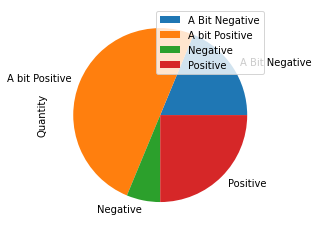

In [78]:
df2.groupby(['Rating']).sum().plot(kind='pie', y='Quantity')

In [ ]:
#Seems mostly good